In [2]:
from gedcom.parser import Parser

from utils import *

In [3]:
file_path = '1be160_8651334177cqbs0r626516_A.ged'
gedcom_parser = Parser()
gedcom_parser.parse_file(file_path, False)

# https://github.com/nickreynke/python-gedcom/issues/47
# ./.local/lib/python3.8/site-packages/gedcom/parser.py

import pickle
# for streamlit
with open('gedcom_parser.bin', 'wb') as handle:
    pickle.dump(gedcom_parser, handle, protocol=pickle.HIGHEST_PROTOCOL)

root_child_elements = gedcom_parser.get_root_child_elements()

UnicodeDecodeError found: 147 b'2 CONC &ouml;lt&ouml;z&ouml;tt Tokajba. Ebben az &eacute;vben apj&aacute;t &aacute;llamos&iacute;tott&aacute;k &eacute;s&nbsp; kitelep&iacute;tett&eacute;k Budapestr\xc5\x91l Nagyf&uuml;gedre, valahogy a t&uuml;d\xc5\r\n'
UnicodeDecodeError found: 148 b'2 CONC \x91gondoz&oacute; &eacute;s a v&aacute;ros vezet\xc5\x91in&eacute;l elint&eacute;zte, hogy apja, anyja &eacute;s huga szint&eacute;n Tokajba k&ouml;lt&ouml;zhessenek,&nbsp;igy a lak&aacute;sban heten laktak. \r\n'
UnicodeDecodeError found: 530 b'2 CONC acute;l kort&aacute;rsa volt, aki valahogy szerencs&eacute;sen &aacute;tv&eacute;szelte az &aacute;llamos&iacute;t&aacute;sokat &eacute;s kitelep&iacute;t&eacute;seket. A&nbsp;k&eacute;t nagykeresked\xc5\r\n'
UnicodeDecodeError found: 531 b'2 CONC \x91 k&ouml;z&ouml;s &uuml;gyleteir\xc5\x91l vannak feljegyz&eacute;sek a csal&aacute;di hagyat&eacute;kban. A szentendrei H&Eacute;V lehet\xc5\x91s&eacute;get biztos&iacute;tott a nagyobb t&aacute;vols&aa

In [27]:
andrassy = find(root_child_elements, 'Andrássy', 'Ilona')

/home/gorogm/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
levi = find(root_child_elements, 'Hodován', 'Levente')
mama = find(root_child_elements, 'Osztie', 'Hilda')
horthy = find(root_child_elements, 'Horthy', 'Miklós')
bela_geri = find(root_child_elements, 'Béla', 'Gergely')
benczur = find(root_child_elements, 'Benczúr', 'Gyula')
me = find(root_child_elements, 'Görög', 'Márton Jenő')

found


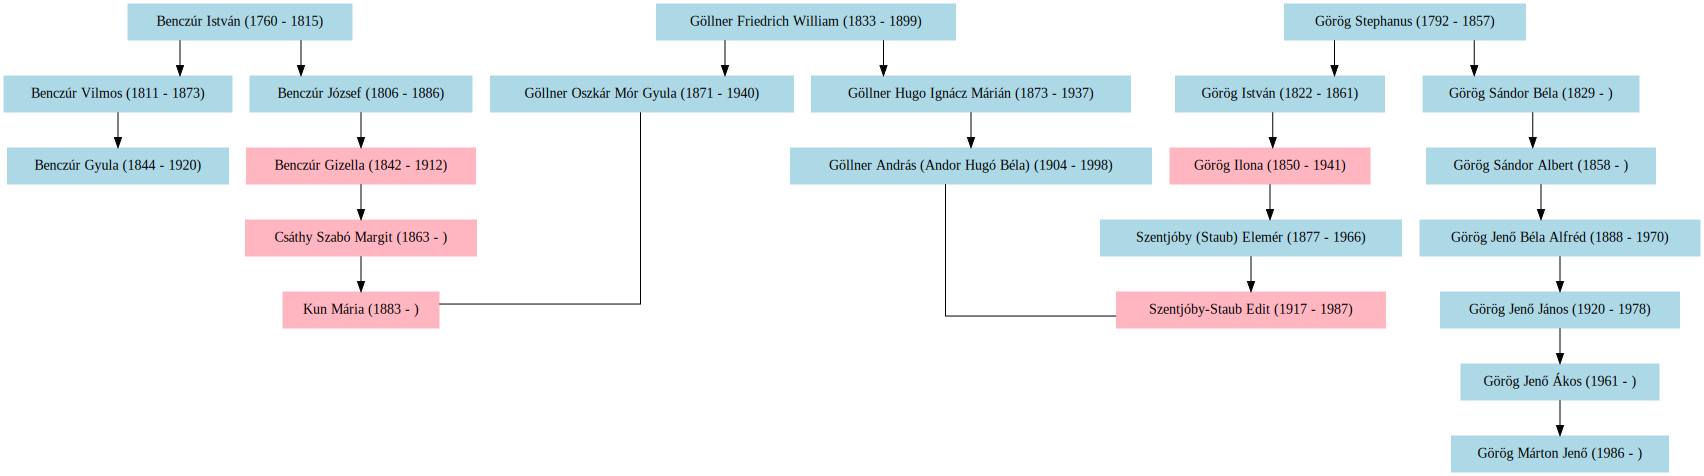

In [5]:
target = benczur
jumps = findConnection(gedcom_parser, me, target)

drawJumps(gedcom_parser, target, jumps)

In [5]:
with open('facebook_ismerosok.txt', 'r') as f:
    lines = f.readlines()
lines = [x.replace('\n', '') for x in lines if ' 20' not in x]

In [ ]:
for line in lines:
    parts = line.split(' ')
    if len(parts) != 2:
        print('Skipping ' + line)
        continue
    for element in root_child_elements:
        if isinstance(element, IndividualElement):
            (first, last) = element.get_name()
            if parts[0] in last and parts[1] in first:
                    print(toString(element))
            if parts[1] in last and parts[0] in first:
                    print(toString(element))

Skipping Sema Yolgörmez Dönmez
Skipping Zsófia Eszter Rutkay
Skipping Hegedűsné Hornung Eszter
Skipping Selda Ballı Yılmaz
Skipping Arzu Türkay Kutsal
Baytürk Mustafa (1955 - )
Skipping Berk Can Kozan
Skipping Nurhayat Baytürk Incekulak
Skipping Selvet Molla Baytürk
Skipping Flóra Sára Pólik
Cseh (Czech) György (1848 - )
Osztie Adél Katalin (1963 - )
Osztie Katalin (2008 - )
Osztie Katalin ( - )
Osztie Katalin (1843 - )
Skipping Bence Gergely Hoppál
Skipping Nikolett Fülöpné Taár
Horváth András (1850 - )
Horváth András ( - )
Skipping Simon Tibor Steve
Skipping Edit Köllerné Kozma
Skipping Mariann Kinga Árkosi
Skipping Gergő Péter Bese
Sipos Katalin (1744 - 1802)
Kovács Tamás (1953 - )
Tasnádi Nagy Laszlo Lorincz (1847 - )
Skipping Móró Milán János
Skipping Márton Áron Goda
Skipping Rahmani M. Edris
Lobkowicz Johann Nepomuk (1799 - 1878)
Skipping Tamás Csaba Kádár
Bernáth György ( - )
Klemm Luca ( - )
Horváth Péter ( - )
Horváth Péter ( - )
Szalay Ferenc (1886 - 1923)
Szalay Gábor Ágost

In [7]:
# find standalone people

def findStandalone(gedcom_parser):
    for l in root_child_elements:
        if isinstance(l, IndividualElement):
            has_family_member = False
            families = gedcom_parser.get_families(l)
            for f in families:
                for p in gedcom_parser.get_family_members(f):
                    if p != l:
                        has_family_member = True
                        break
            for p in gedcom_parser.get_parents(l):
                has_family_member = True
                break
            if has_family_member is False:
                print('No family member: ' + toString(l))
                print(l.get_individual())

# findStandalone(gedcom_parser)

/home/gorogm/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Duplicated people
import pandas as pd

def findDuplicated(gedcom_parser):
    # Runs for 54 minutes :O
    all_people = pd.DataFrame(columns=['family_name', 'given_name', 'birthyear', 'deathyear', 'sex'])
    for l in root_child_elements:
        if isinstance(l, IndividualElement):
            all_people.loc[l.get_pointer()] = [l.get_name()[1], l.get_name()[0], l.get_birth_year(), l.get_death_year(), l.get_gender()]
    return all_people
all = findDuplicated(gedcom_parser)

In [9]:
all

/home/gorogm/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,family_name,given_name,birthyear,deathyear,sex
@I1@,"Hollai (sz: Haszmann, vált. 1938.03.23.)",János Pál,1913,1964,M
@I2@,Tichy-Rács,Erzsébet,1916,1983,F
@I3@,Hollai,Pál,1944,-1,M
@I4@,Haszmann (szül: Haasmann),Pál,1880,1963,M
@I5@,Branauer,Adelheid (Etelka),1889,1964,F
...,...,...,...,...,...
@I608640@,Döbrentey,Sándor Gusztáv,1873,-1,M
@I608641@,Stummer,Ludovicus Michael Alexius,1822,-1,M
@I608642@,Stummer,Arnoldus,1822,-1,M
@I608643@,Stummer,Johanna Mária Anna Aurélia,1828,-1,F


In [10]:
duplicated = all[(all.duplicated(keep=False)) & (all.family_name.str.len() > 1)].sort_values(['family_name', 'given_name'])
duplicated.to_excel('duplicated.xlsx')

/home/gorogm/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# TODO: There are links that can be visited from one direction only :(
# eg. to Jolán Görög there's no link from above

/home/gorogm/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# find islands

main_group = getAllReachableFromPeople(gedcom_parser, me)
len(main_group), 'out of ', getTotalCount(root_child_elements)

separate_trees = []
separate_all = set()
for element in root_child_elements:
    if isinstance(element, IndividualElement):
        if element not in main_group and element not in separate_all:
            # print(toString(element))
            new_group = getAllReachableFromPeople(gedcom_parser, element)
            if len(new_group) < 90000:  # 'Jolán Görög' bug
                separate_all = separate_all.union(new_group)
                separate_trees.append(new_group)
                print(len(new_group))

# TODO delete all 'separate_trees/*.txt' files

for sti in range(len(separate_trees)):
    with open(f'separate_trees/{sti}.txt', 'wt') as f:
        for p in separate_trees[sti]:
            f.write(toString(p, with_id=True) + '\r\n')

41
100
7
